**Denise Dodd:
Miami Housing Price Prediction (Random Forest Regression with Hypertuning and Feature Importance)**

# **Table of Contents**

[Introduction](#Intro)

[Load Data and Modules](#Loading)

[Review Data](#Review_Data)

[Correlations](#Correlations)

[Prepare for Regression](#Prepare)

[Regression Selection](#Regression)

[Random Forest Regression](#Random)

[Feature Importance](#Features)

[Predictions](#Predict)

# **Introduction** <a id="Intro"></a>

In this project, I will be predicting the cost of houses based on the Miami Housing dataset found here: https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset. In addition to variables found in most housing datasets such as price and square footage, this dataset includes several variables detailing the house's distance to important locations such as highways, railways, and the ocean.  It also has a variable detailing the dollar value the special features of the home (i.e. a pool, air conditioning, basement, etc.) add the price of a home.

# **Load Data and Modules** <a id="Loading"></a>

In [1]:
# Import needed modules.
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set directory and load data.
os.chdir('C:/Users/hadle/Downloads')
df = pd.read_csv('miami-housing.csv')

# Check for accuracy
current_shape = df.shape
print(f"The current shape of the dataframe is {current_shape}.")
df.head(5)

The current shape of the dataframe is (13932, 17).


,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


# **Review Data** <a id="Review_Data"></a>

Before I engage in data manipulation, I will rename the columns to include units of measurement so I have a better understanding of the variables.

In [3]:
# Dictionary to map old column names to new column names.
new_column_names = {
    'LATITUDE': 'latitude',
    'LONGITUDE': 'longitude',
    'PARCELNO': 'parcel_num',
    'SALE_PRC': 'sale_price($)',
    'LND_SQFOOT': 'land_area(sqft)',
    'TOT_LVG_AREA': 'living_area(sqft)',
    'SPEC_FEAT_VAL': 'spec_feat_val($)',
    'RAIL_DIST': 'rail_dist(ft)',
    'OCEAN_DIST': 'ocean_dist(ft)',
    'WATER_DIST': 'water_dist(ft)',
    'CNTR_DIST': 'cnty_dist(ft)',
    'SUBCNTR_DI': 'subcnty_dist(ft)',
    'HWY_DIST': 'hwy_dist(ft)',
    'age': 'age(yrs)',
    'avno60plus': 'plane_noise(dummy)',
    'month_sold': 'month_sold(2016)',
    'structure_quality': 'structure_quality'
}

# Rename columns using above dictionary.
df.rename(columns=new_column_names, inplace=True)

#Display df.
df.head(5)

,latitude,longitude,parcel_num,sale_price($),land_area(sqft),living_area(sqft),spec_feat_val($),rail_dist(ft),ocean_dist(ft),water_dist(ft),cnty_dist(ft),subcnty_dist(ft),hwy_dist(ft),age(yrs),plane_noise(dummy),month_sold(2016),structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


------------------------------------------------------------
Review the data type for each column so I have a better understanding of the data and what manipulations I can perform.

In [4]:
# Find the data type for each column.
df.dtypes

latitude              float64
longitude             float64
parcel_num              int64
sale_price($)         float64
land_area(sqft)         int64
living_area(sqft)       int64
spec_feat_val($)        int64
rail_dist(ft)         float64
ocean_dist(ft)        float64
water_dist(ft)        float64
cnty_dist(ft)         float64
subcnty_dist(ft)      float64
hwy_dist(ft)          float64
age(yrs)                int64
plane_noise(dummy)      int64
month_sold(2016)        int64
structure_quality       int64
dtype: object

All variables are numeric.

------------------------------------------------------------
Determine if there are any nulls in the dataset that need to be addressed.

In [5]:
# Find the number of nulls that each column holds.
df.isnull().sum()

latitude              0
longitude             0
parcel_num            0
sale_price($)         0
land_area(sqft)       0
living_area(sqft)     0
spec_feat_val($)      0
rail_dist(ft)         0
ocean_dist(ft)        0
water_dist(ft)        0
cnty_dist(ft)         0
subcnty_dist(ft)      0
hwy_dist(ft)          0
age(yrs)              0
plane_noise(dummy)    0
month_sold(2016)      0
structure_quality     0
dtype: int64

There are no null values.

------------------------------------------------------------
Review which columns have entries with a '0' value to determine if this is a feasible value for these columns.

In [6]:
# Count the number of '0' entries in each column.
(df == 0).sum()

latitude                  0
longitude                 0
parcel_num                0
sale_price($)             0
land_area(sqft)           0
living_area(sqft)         0
spec_feat_val($)       2290
rail_dist(ft)             0
ocean_dist(ft)            0
water_dist(ft)          108
cnty_dist(ft)             0
subcnty_dist(ft)          0
hwy_dist(ft)              0
age(yrs)               1003
plane_noise(dummy)    13724
month_sold(2016)          0
structure_quality         0
dtype: int64

There are no unreasonable entries with a '0' value.

------------------------------------------------------------
Create histograms of each col to review for outliers.

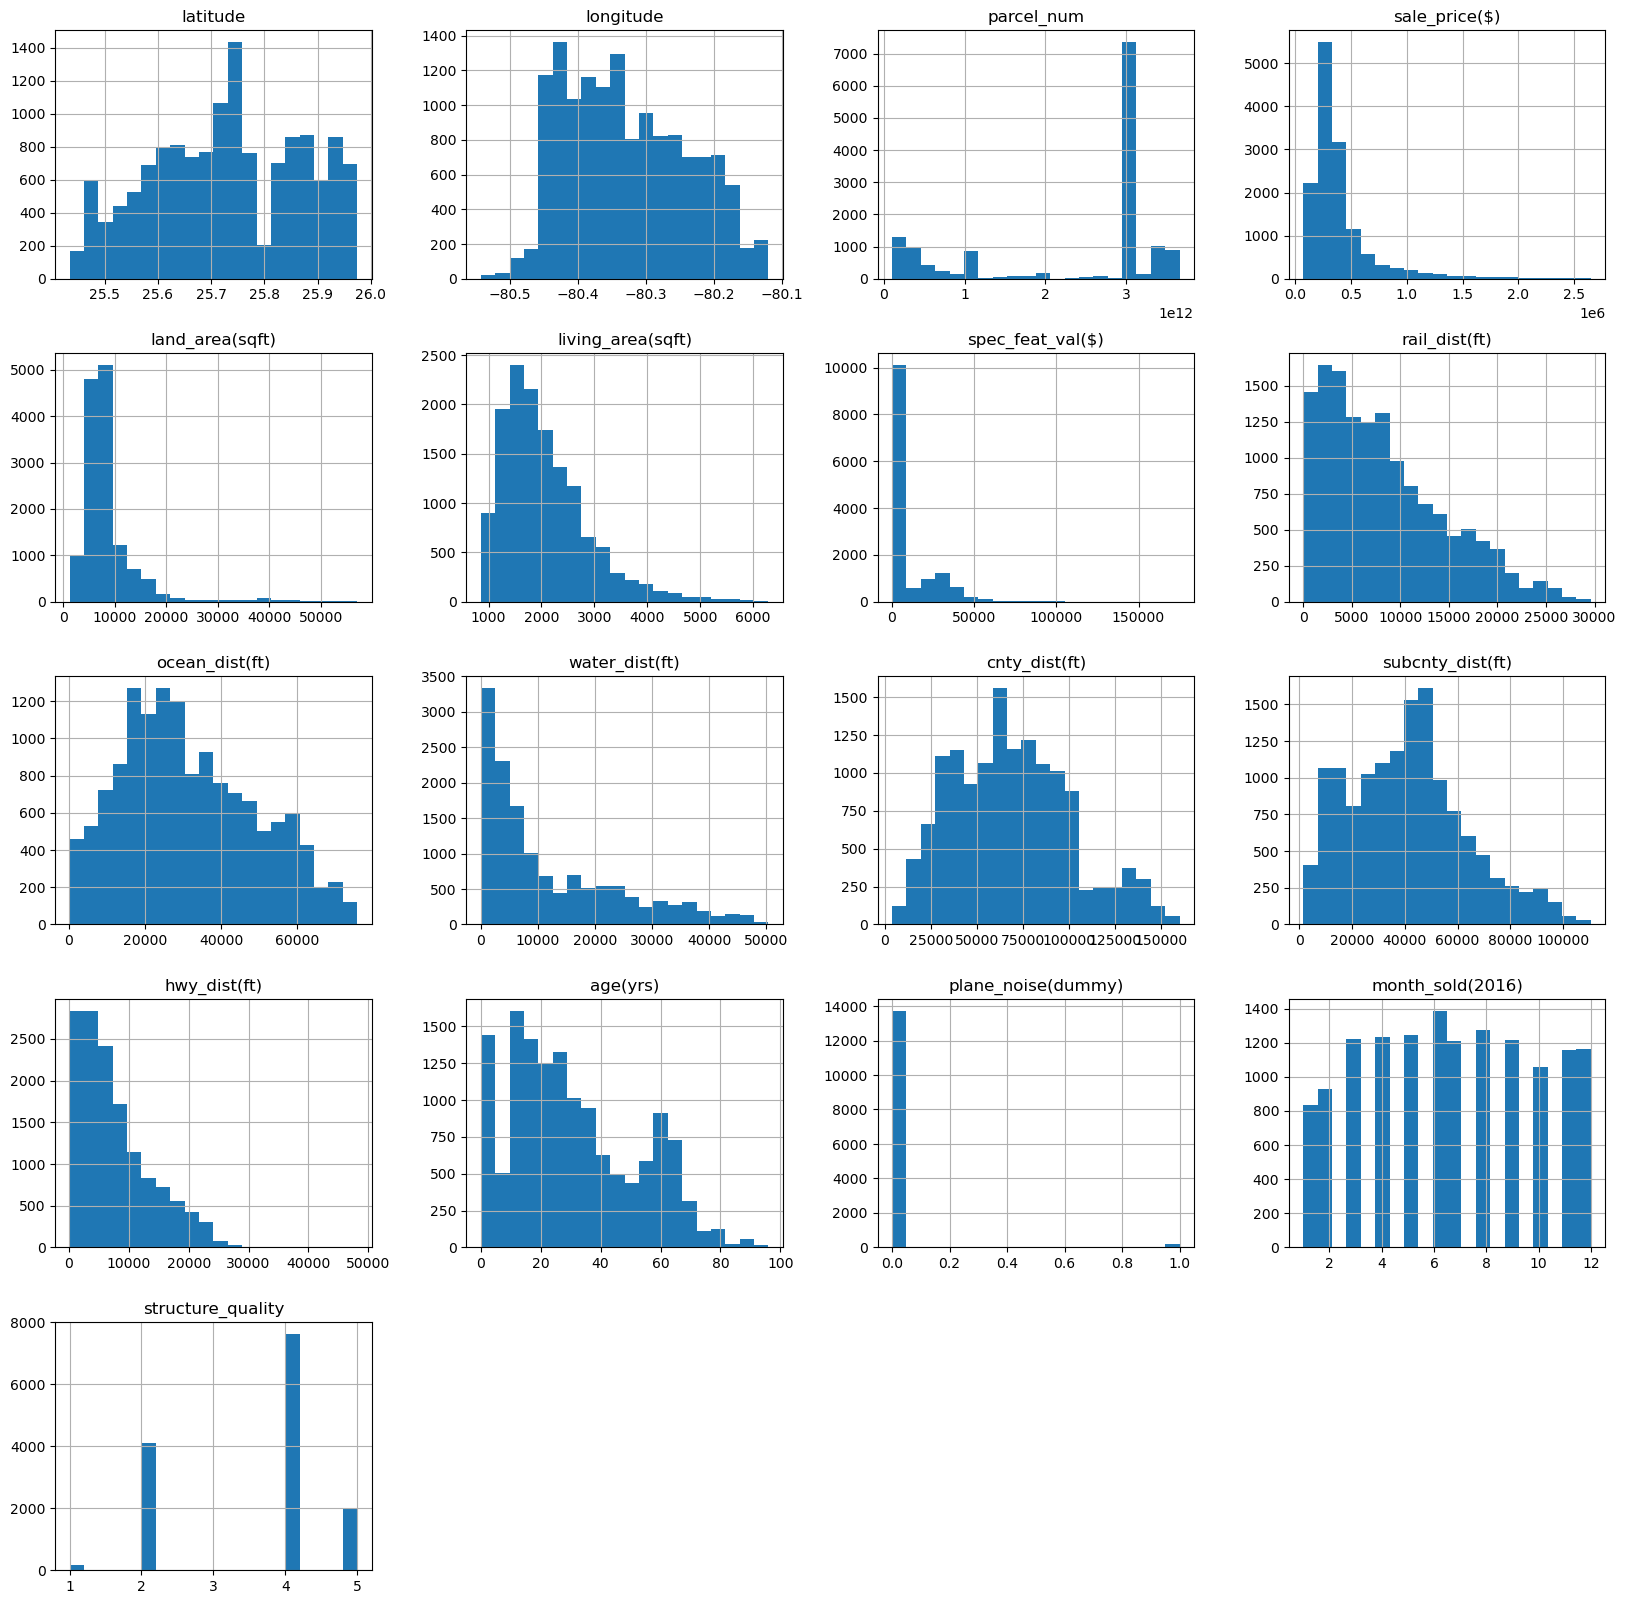

In [7]:
# Create histogram for every col in the data frame.
# Set bin size to 20 and increase the figure size for ease of viewing.
# Include ';' so only the graphs are displayed and not auxiliary data.
df.hist(bins = 20, figsize = (20,20));

_________________
The histograms show that many variables appear skewed to the right, but the spec_feat_val($) and hwy_dist(ft) variables seemed significantly skewed, so I will create box plots for these variables to review for outliers.

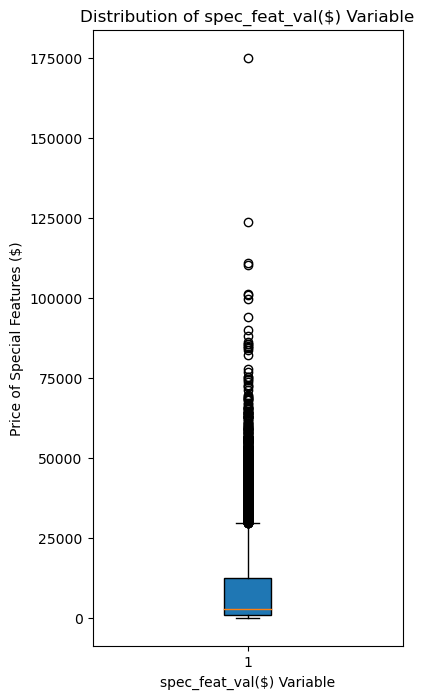

In [8]:
# Adjust figure size for ease of viewing.
plt.figure(figsize=(4, 8))

# Create the box plot of spec_feat_val($) variable.
# Shade in the box representing the middle quartiles for ease of viewing.
bp = plt.boxplot(df['spec_feat_val($)'], patch_artist=True)

# Assign chart title and axis labels.
plt.title('Distribution of spec_feat_val($) Variable')
plt.xlabel('spec_feat_val($) Variable')
plt.ylabel('Price of Special Features ($)')

# Display graph.
plt.show()

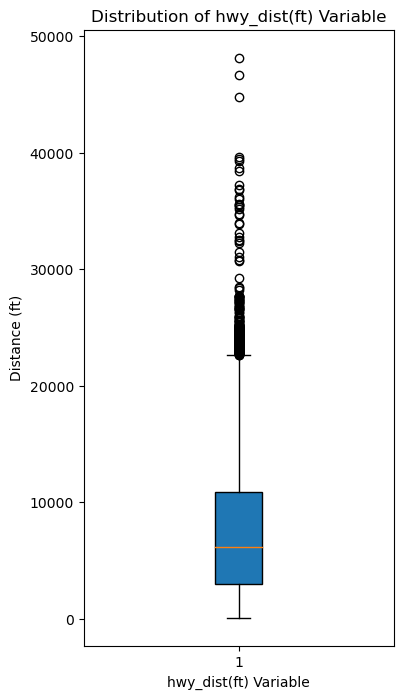

In [9]:
# Adjust figure size for ease of viewing.
plt.figure(figsize=(4, 8))

# Create the box plot of hwy_dist(ft) variable.
# Shade in the box reprsenting the middle quartiles for ease of viewing.
bp = plt.boxplot(df['hwy_dist(ft)'], patch_artist=True)

# Assign chart title and axis labels.
plt.title('Distribution of hwy_dist(ft) Variable')
plt.xlabel('hwy_dist(ft) Variable')
plt.ylabel('Distance (ft)')

# Display graph.
plt.show()

Based on the box plot, it appears that there are a few outlier entries where the value of the special features are greater than $100,000. I will isolate and review those entries.

In [10]:
# Create data frame which only includes entries with
# a special feature value greater than $100,000.
high_spec_feat = df[df['spec_feat_val($)'] > 100000]

# Display dataframe.
print(high_spec_feat.shape)
high_spec_feat

(6, 17)


,latitude,longitude,parcel_num,sale_price($),land_area(sqft),living_area(sqft),spec_feat_val($),rail_dist(ft),ocean_dist(ft),water_dist(ft),cnty_dist(ft),subcnty_dist(ft),hwy_dist(ft),age(yrs),plane_noise(dummy),month_sold(2016),structure_quality
4605,25.673949,-80.298899,2050120040030,1500000.0,45302,5821,110238,6068.3,11580.1,5096.6,51006.0,6946.7,5529.8,21,0,11,4
4615,25.677741,-80.294084,2050010090270,2150000.0,36154,5358,110895,6108.9,10269.7,4314.3,48917.5,7281.3,6667.3,17,0,11,5
5810,25.676432,-80.338319,3050040090250,1406000.0,38463,5555,123590,5840.6,23725.3,17983.6,60078.8,9152.9,5578.9,22,0,10,5
6635,25.804661,-80.330616,3530270710590,1063200.0,4730,4276,175020,3631.3,41376.8,3216.1,46482.1,30960.1,3117.9,0,0,5,5
8433,25.557114,-80.491731,3068130080040,490000.0,39378,4441,101214,4271.7,53757.6,30083.8,126626.3,75556.6,30785.3,10,0,7,4
10877,25.547545,-80.531969,3068210000590,460000.0,54886,2495,100780,13934.2,65495.7,18961.7,139220.2,88214.7,38398.5,29,0,6,4


------------------------------------------------------------
Isolate and review the entries where the distance to a highway is greater than 35,000 ft.  Based on the box plots, these appear to be outliers.

In [11]:
# Create data frame which only includes entries with
# a distance to a highway greater than 350,000 ft.
high_hwy_dist = df[df['hwy_dist(ft)'] > 35000]

# Display dataframe.
print(high_hwy_dist.shape)
high_hwy_dist

(18, 17)


,latitude,longitude,parcel_num,sale_price($),land_area(sqft),living_area(sqft),spec_feat_val($),rail_dist(ft),ocean_dist(ft),water_dist(ft),cnty_dist(ft),subcnty_dist(ft),hwy_dist(ft),age(yrs),plane_noise(dummy),month_sold(2016),structure_quality
8438,25.567076,-80.500897,3068110000262,277200.0,34848,2781,4498,8977.3,57481.6,30641.1,126790.1,75776.8,35371.3,29,0,7,4
8439,25.567597,-80.500982,3068110000261,329500.0,35284,2265,11650,9146.6,57540.3,30793.8,126708.9,75698.3,35517.1,13,0,2,4
8440,25.567597,-80.500982,3068110000261,340000.0,35284,2265,11650,9146.6,57540.3,30793.8,126708.9,75698.3,35517.1,13,0,11,4
8444,25.603092,-80.486330,3058360010500,300000.0,20711,2701,9674,12744.4,57558.7,38533.5,115346.6,64747.0,35126.0,33,0,8,2
10869,25.539684,-80.535410,3068210002860,350000.0,54450,2657,6384,14690.8,65836.6,15930.1,141814.6,90775.5,36814.0,28,0,5,4
10871,25.540289,-80.531365,3068210004230,200000.0,54450,1175,9787,13450.3,64656.3,16801.6,140652.0,89605.4,36177.5,31,0,9,2
10872,25.541136,-80.527367,3068210003940,250000.0,56192,2611,16282,12096.2,63410.0,17811.5,139405.9,88351.6,35636.8,33,0,6,4
10873,25.541277,-80.529172,3068210004000,450000.0,54450,6074,5215,12739.6,64032.0,17496.9,139855.2,88806.6,36016.8,20,0,4,4
10874,25.541531,-80.542158,3068210003020,275000.0,54886,1758,8944,16941.7,68160.6,15585.6,143189.6,92186.3,38701.1,23,0,6,4
10875,25.544747,-80.542172,3068210002050,475000.0,54450,4221,65405,17035.9,68432.7,16680.0,142499.7,91519.9,39633.5,33,0,3,4


After my initial review, I don't see any other data associated with these entries that appear to be invalid. I will keep all entries in the data frame. Index 6635 has an interesting land area to living area ratio and sale price to value of special features ratio.  The company can discuss what parameters they would like to place on outliers and if necessary lines such as 6635 can be removed and models can be re-evaluated.

# **Correlations** <a id="Correlations"></a>

I will create a correlation heatmap to ensure that there are no variables with an especially high rate of correlation with the sale_price($) variable as this would raise concerns of multicollinearity. I will also note the variables that are strongly (both positively and negatively) correlated with sale price.

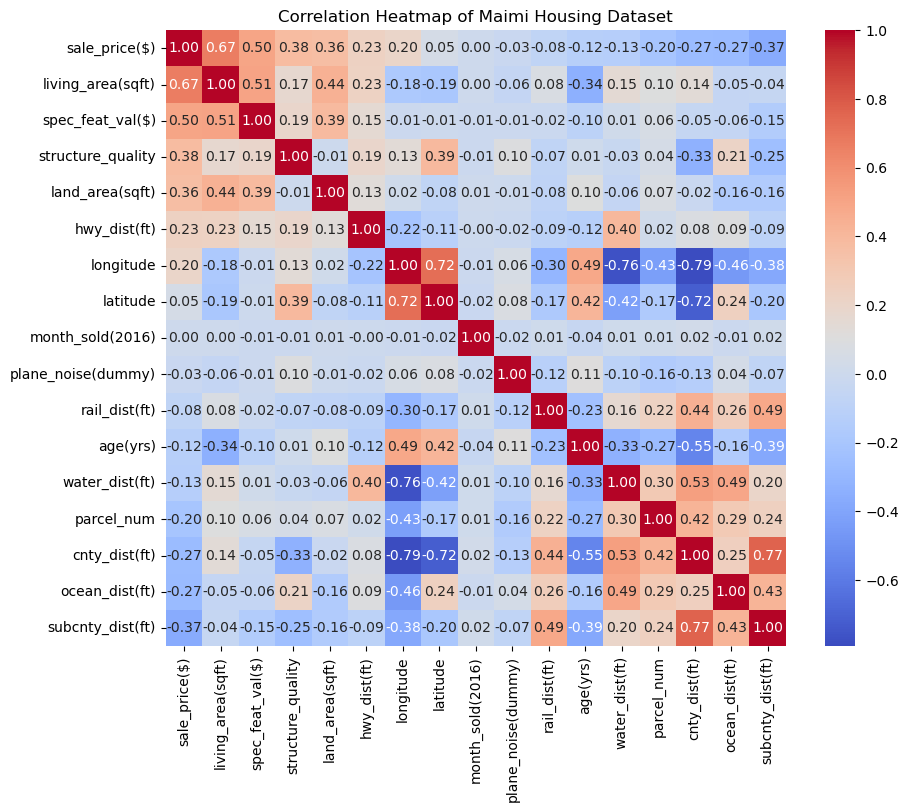

In [12]:
# Create a correlation matrix of entire data frame.
# Sort the correlation matrix based on the other variables' correlations
# with the sale_price($) variable.
sale_price_corr = df.corr()['sale_price($)'].sort_values(ascending=False)

# Convert the indices (variable names) of the above
# sale_price_corr series to a list.
# Sort (reindex) the original df based on the order of the sale_price_corr indices.
# (which were sorted based on correlation with sale_price($) variable above).
viz_corr_df = df.reindex(columns=sale_price_corr.index.tolist())

# Create a heatmap of the other variables' correlations
# with the sale_price($) variable.
# Increase figure size for ease of viewing.
# Display correlation values in heat map by including annotations.
# Round correlations to the second decimal.
# Otherwise the annotations overlap and are illegible.
# Add a color palette so high correlations are red and lower correlations are blue.
# Assign graph title.
# Display graph.
plt.figure(figsize=(10, 8))
sns.heatmap(viz_corr_df.corr(), annot=True,  fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Maimi Housing Dataset")
plt.show()

# **Prepare for Regression** <a id="Prepare"></a>

There are no categorical variables, so no dummies need to be created.

Assign features and target sets and split them into testing and training sets.

In [13]:
# Assign feature and target variables.
features = df.drop(['sale_price($)'], axis=1)
target = df['sale_price($)']

In [14]:
# Split the variables into training and test sets using an 80/20 split
# and a random state of 42 for continuity.
features_train, features_test, target_train, target_test = \
    train_test_split(features, target, train_size=0.8, test_size=0.2,
                     random_state=0)

Scale the dataset to standardize the data as distance, cost, and age are all varying scales. Using the MinMaxScaler (as opposed to StandardScaler) as the above histograms show that many variables are skewed and do not have a normal distribution.

In [15]:
# Initiate MinMaxScaler.
# Fit the scaler to the features training df.
# Use the scaler to transform the features training and test dfs.
scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# **Regression Selection** <a id="Regression"></a>

Run the data through a loop of several regression models to determine the best fitting model based on RMSE and R-Squared value.

In [16]:
# Determine best model for data.

# Store model names and instance of models in tuple variable.
# Use random state = 42 for consistency when re-running the models.
models=[("Linear Regression",LinearRegression()), 
        ("Lasso Regression",Lasso(random_state=42)), 
        ("Ridge Regression",Ridge(random_state=42)), 
        ("Elastic Net", ElasticNet(random_state=42)),
        ("K-Nearest Neighbors",KNeighborsClassifier()), 
        ("Decision Tree",DecisionTreeRegressor(random_state=42)), 
        ("Random Forest",RandomForestRegressor(random_state=42))]

# For loop to iterate through each name and model in tuple.
# Fit the models on training variables.
# Make predictions based on features_test variable.
# Print model name and metrics.
for name,model in models:
    model.fit(features_train_scaled,target_train)
    predictions = model.predict(features_test_scaled)
    print(f'Model: {name}')
    print(f'RMSE: {np.sqrt(mean_squared_error(target_test,predictions))}')
    print(f'R-Squared: {r2_score(target_test,predictions)}\n')

Model: Linear Regression
RMSE: 165045.37388119646
R-Squared: 0.7107978731280679

Model: Lasso Regression
RMSE: 165039.9607394653
R-Squared: 0.7108168432620676

Model: Ridge Regression
RMSE: 164882.24968268987
R-Squared: 0.7113692620822839

Model: Elastic Net
RMSE: 282856.6191011291
R-Squared: 0.150570258577012

Model: K-Nearest Neighbors
RMSE: 171825.94433085943
R-Squared: 0.6865471306674302

Model: Decision Tree
RMSE: 134120.26291601342
R-Squared: 0.8090219022978482

Model: Random Forest
RMSE: 89491.49497257934
R-Squared: 0.914972717888786



Based on the above metrics the Decision Tree and Random Forest regression models appear to be the best fits for this data. I'm not surprised that these models have similar metrics as Random Forest is an ensemble model made of several decision trees. These models both have an R2 value from .809 to .915 meaning that 81% to 91.5% of the variance in price (target variable) can be explained by the model. These models also show the lowest RMSE values which indicates a smaller average range of errors.

-------------------------------
Create regression plots of top two models with a target line to determine which model has less spread of predicted versus actual values, and which model has more clustering around the target line.

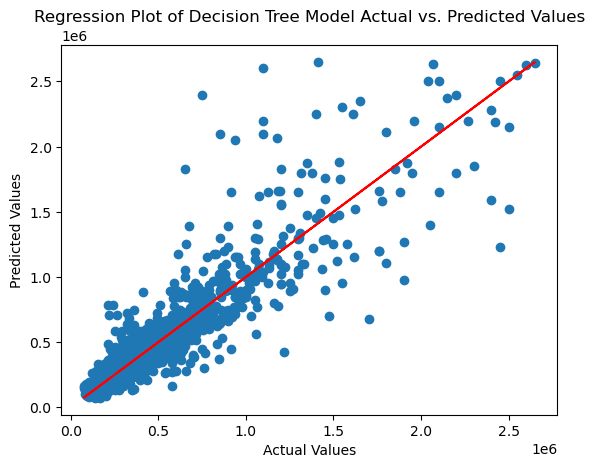

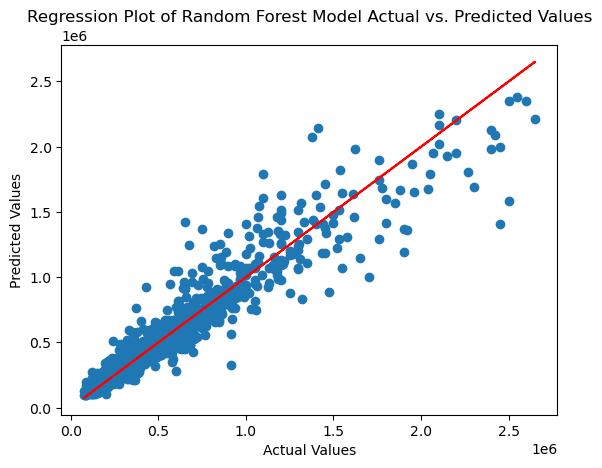

In [17]:
# Store model names and instance of top two models in tuple variable.
reg_models=[("Decision Tree",DecisionTreeRegressor(random_state=42)), 
            ("Random Forest",RandomForestRegressor(random_state=42))]

# For loop to iterate through each name and model in reg_models tuple.
for name,model in reg_models:
    # Fit the models on training variables.
    # Make predictions based on features_test variable.
    # These are duplicate lines of code from the previous loop.
    model.fit(features_train_scaled,target_train)
    predictions = model.predict(features_test_scaled)
    
    # Create residual plot and target line for top models.
    # Assign chart title and axis labels.
    # Display graph.
    plt.scatter(target_test, predictions)
    plt.plot(target_test, target_test, color='red')  
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Regression Plot of {name} Model Actual vs. Predicted Values')
    plt.show()

The Random Forest regression model has the best RMSE and R-Squared metrics and the regression plot shows fewer outliers. I will move forward with the Random Forest regression model.

# **Random Forest Regression** <a id="Random"></a>

Use a grid search to determine the best hyperparameters to be used in the Random Forest model to achieve optimal results.

In [18]:
# Establish the parameters to be used in grid search.
# n_estimators = Because Random Forest is an ensemble model, 
# this determines how many decision trees the RFR model should use.
# max_depth = Determines how deep each tree should go.
# min_samples_split = Indicates the min number of samples a node must have
# in order to be split.
# min_samples_leaf = Indicates min number each node must have.
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initiate a grid search on the Random Forest model using the above parameters, 
# negative mean squared error as the scoring metric, 5 folds for cross validation, 
# and using all CPUs in my computer to speed up the (very long) process.
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=parameters,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1)

# Fit the above grid search on the training data.
grid_search.fit(features_train_scaled, target_train)

# Print the best hyperparameters found in the above grid search.
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [19]:
# Initate instance of random forest regression model with the best hyperparameters.
hyper_rfr = RandomForestRegressor(max_depth=None, min_samples_leaf=1,
                                  min_samples_split=2, n_estimators=150,
                                  random_state=42)

# Fit hyper-tuned random forest model using the training variables.
hyper_rfr.fit(features_train_scaled, target_train)

# Use the hyper-tuned random forest model to make a prediction variable for
# sale price based on the features test variable.
hyper_pred = hyper_rfr.predict(features_test_scaled)

#Confirm metrics.
RMSE = np.sqrt(mean_squared_error
               (target_test,hyper_rfr.predict(features_test_scaled)))
R2 = r2_score(target_test,hyper_rfr.predict(features_test_scaled))
print(f'RMSE: {RMSE}')
print(f'R-Squared: {R2}')

RMSE: 89447.13636534654
R-Squared: 0.9150569886241808


# **Feature Importance** <a id="Features"></a>

In [20]:
# Get the importance of each feature to the hyper_rfr model.
feat_import = hyper_rfr.feature_importances_

# Get a record of the feature names by getting the name of the cols
# in the original df minus the target variable.
feat_names = df.drop(['sale_price($)'], axis=1).columns

# Zip (partner) each feature name with it's importance score
# and store in a dictionary.
feat_impact = dict(zip(feat_names, feat_import))

# Sort feat_impact in descending order by the by the 2nd element
# in each paring (importance score).
feat_impact = sorted(feat_impact.items(), key=lambda x: x[1], reverse=True)

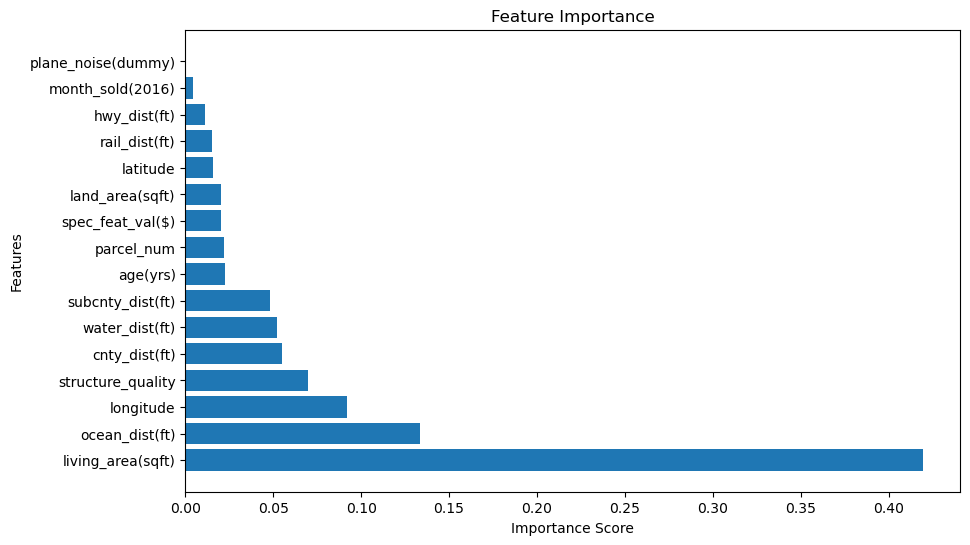

In [21]:
# Extract features and their importances from feat_impact
# and make seperate list for both
# so they can each be graphed on their own axis.
feat_list = [item[0] for item in feat_impact]
import_list = [item[1] for item in feat_impact]

# Create bar graph showing each feature
# and their importance in the hyper_rfr model.
# Incease figure size for ease of viewing.
# Graph feat_list on y-axis and import_list on x-axis.
#Assign graph title and axis labels.
# Display graph.
plt.figure(figsize=(10, 6))
plt.barh(feat_list, import_list)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


This shows how important each feature is when predicting sale price.  The square footage of the living area is by far the most important feature. If a client wishes to adjust their predicted sale price, adjusting their desired square footage of living space will have the greatest results in altering sale price.

# **Predictions** <a id="Predict"></a>

In [22]:
# Create predictive df with entry matching feautres in orignal df.
predict_df = pd.DataFrame({
    'latitude': [25.64046488],
    'longitude': ['-80.30454807'],
    'parcel_num': [3350230020160],   
    'land_area(sqft)': [39204],       
    'living_area(sqft)': [1771],
    'spec_feat_val($)': [16248],
    'rail_dist(ft)': [9372.1],
    'ocean_dist(ft)': [7023],
    'water_dist(ft)': [3337],    
    'cnty_dist(ft)': [61565],   
    'subcnty_dist(ft)': [17588.6],
    'hwy_dist(ft)': [14200.4],   
    'age(yrs)': [39],     
    'plane_noise(dummy)': [0],    
    'month_sold(2016)': [4],    
    'structure_quality': [2.753898305]})

# Transform predictive df with the scaler that was already fitted above.
predict_df_scaled = scaler.transform(predict_df)

# Use the above fitted Random Forest model to make a prediction
# using the scaled predictive df.
prediction = hyper_rfr.predict(predict_df_scaled)

# Print the predicted house price returned by the Random Forest model.
print(f'Predicted cost of house described in predictive df : ${prediction[0]:.2f}.')

Predicted cost of house described in predictive df : $569004.00.


# **Results** <a id="Results"></a>

In [23]:
# Find the row in original df where 'ocean_dist(ft)' equals 7023.0.
# This row has equivalent data as the predictive df above.
og_row = df[df['ocean_dist(ft)'] == 7023.0]

# Print original and predicted sale prices. 
print(f"Original Sales Price: ${float(og_row['sale_price($)'])}.")
print(f"Predicted Sales Price: ${prediction[0]}.")

# Subtract the sale price in the row of the original df with
# matching data to the predictive df
# from the predicted sale price returned by running
# the scaled predictive df through the Random Forest model.
difference = (prediction[0]) - (og_row['sale_price($)'])

# Print the predicted house price returned by the Random Forest model.
# Convert the difference variable from a series to float
# so I can print the rounded result.
print(f'\nDifference between original sales price and predicted sale price:', end='')
print(f'${float(difference):.2f}.')
print(f"This falls within the RMSE value of ${RMSE:.2f}.")

# Calculate, isolate, and print the variance percentage.
variance = ((prediction[0] - og_row['sale_price($)'])/og_row['sale_price($)'])*100
variance = variance.iloc[0]
print(f"\nThis is a {variance:.2f}% variance from the original sales price.")

Original Sales Price: $590000.0.
Predicted Sales Price: $569004.0.

Difference between original sales price and predicted sale price:$-20996.00.
This falls within the RMSE value of $89447.14.

This is a -3.56% variance from the original sales price.
